#  Task 2
## Titanic Classification

### Data set download link :  https://www.kaggle.com/datasets/shubhamgupta012/titanic-dataset

### Import liberies

In [53]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data File Load

In [54]:
titanic_data = pd.read_csv('SVMtrain.csv')

In [55]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [56]:
titanic_data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,447.016393,2.531876,37.314208,0.553734,0.329690,22.117887,2.641166
1,444.358824,1.955882,33.057853,0.476471,0.467647,48.209498,2.364706


### Corelation Matrix and visualization

In [57]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,0.008341,-0.057686,-0.001657,0.012703,0.013166
Survived,-0.005028,1.000000,-0.335549,-0.116558,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.035330,-0.335549,1.000000,-0.122449,0.081656,0.016824,-0.548193,0.164681
Age,0.008341,-0.116558,-0.122449,1.000000,-0.156777,-0.215191,-0.003307,-0.124894
SibSp,-0.057686,-0.034040,0.081656,-0.156777,1.000000,0.414542,0.160887,0.068900
Parch,-0.001657,0.083151,0.016824,-0.215191,0.414542,1.000000,0.217532,0.040449
Fare,0.012703,0.255290,-0.548193,-0.003307,0.160887,0.217532,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.124894,0.068900,0.040449,-0.226311,1.000000


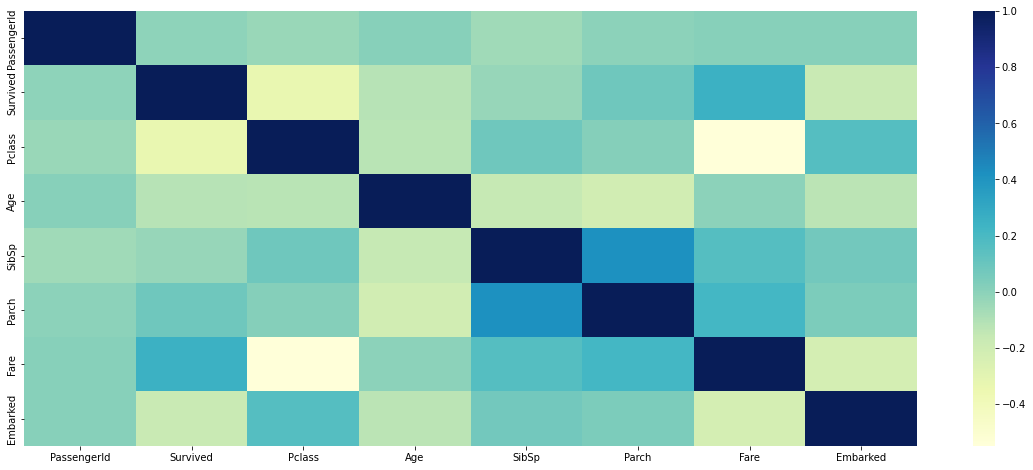

In [58]:
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

In [59]:
male_ind = len(titanic_data[titanic_data['Sex'] == 'Male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 577


In [60]:
male_ind = len(titanic_data[titanic_data['Sex'] == 'female'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 312


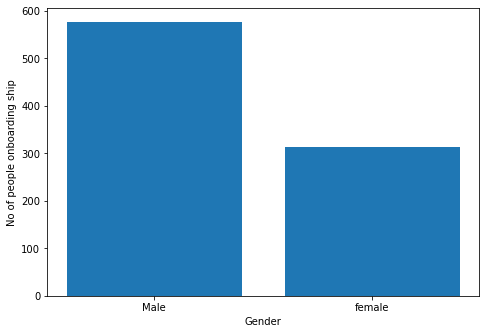

In [61]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','female']
index = [577,312]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

### Analysing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

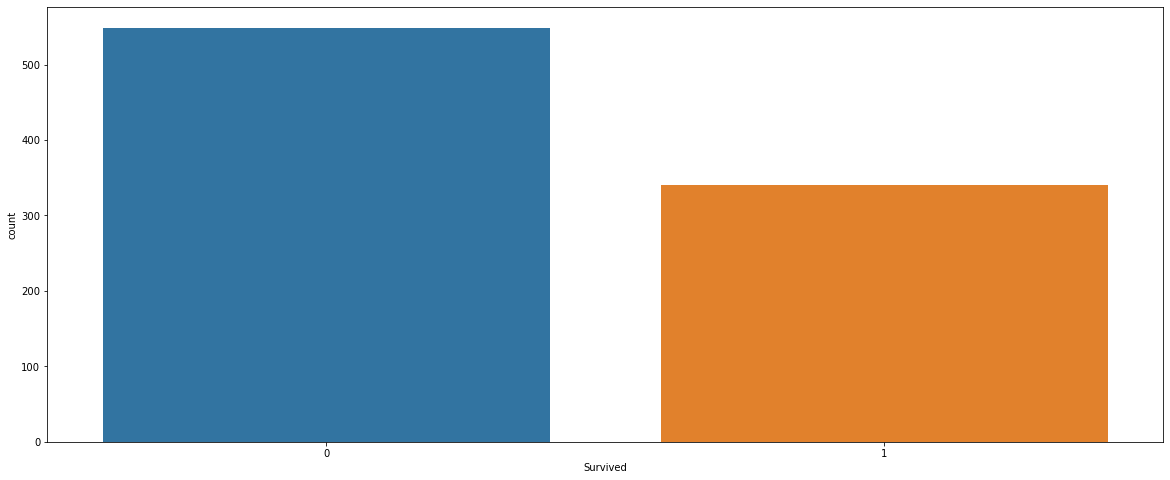

In [62]:

plt.figure(figsize=(20, 8))
sns.countplot(x='Survived',data=titanic_data)# 0 means not survived and 1 means survived


### No of people survived or not on the basis of gender

Text(0, 0.5, 'No of people on ship')

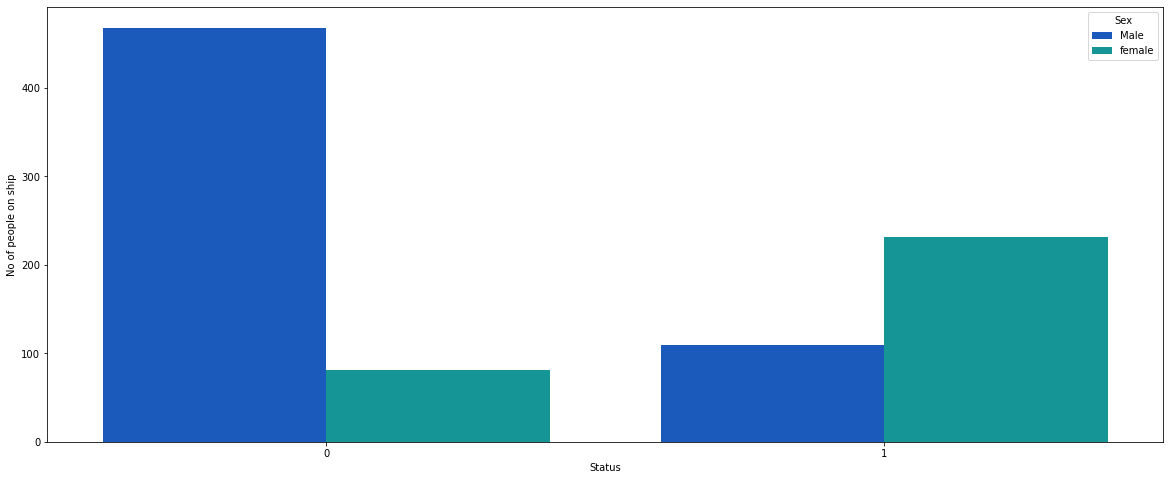

In [63]:

plt.figure(figsize=(20, 8))
sns.countplot(x='Survived', hue='Sex', data=titanic_data, palette='winter')
plt.xlabel("Status")
plt.ylabel("No of people on ship")

### No of people survived or not on the basis of Ticket Class

Text(0.5, 1.0, "Bar graph of people accrding to ticket class in which people couldn't survive")

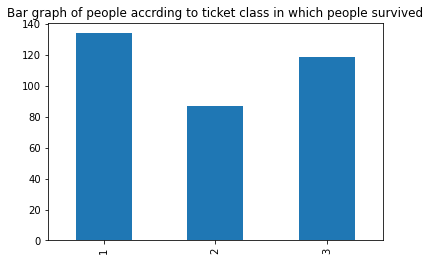

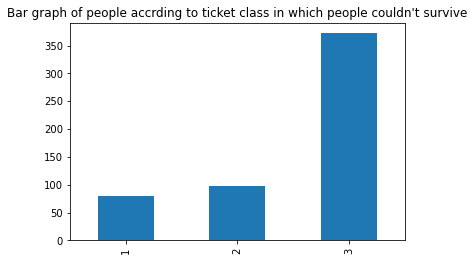

In [64]:
plt.figure(1)
titanic_data.loc[titanic_data['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people survived')


plt.figure(2)
titanic_data.loc[titanic_data['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people couldn\'t survive')

### No of people survived or not on the basis of Age

([<matplotlib.axis.XTick at 0x2495c49d310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

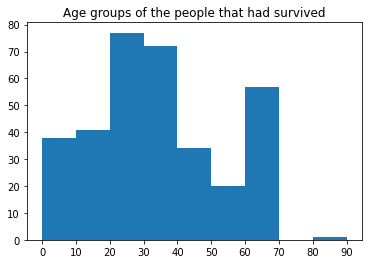

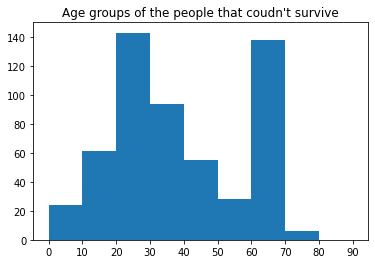

In [65]:
plt.figure(1)
age  = titanic_data.loc[titanic_data.Survived == 1, 'Age']
plt.title('Age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = titanic_data.loc[titanic_data.Survived == 0, 'Age']
plt.title('Age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

### Feature Selection


In [66]:

from sklearn.model_selection import StratifiedShuffleSplit

column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
X=titanic_data[column_train]
Y=titanic_data['Survived']
    

In [67]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

0

###  Convert sex into integer value

In [68]:

d={'Male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()


C:\Users\Windows10\AppData\Local\Temp/ipykernel_12340/2081634535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex']=X['Sex'].apply(lambda x:d[x])


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

### Spliting the model in Training and Testing

In [69]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

### LogisticRegression

In [70]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7790262172284644


C:\Users\Windows10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN Neighbors

In [71]:

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.7078651685393258


### Decision Tree

In [72]:

from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7715355805243446


### Model and Accuracy

In [73]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN' ,'Decision Tree'],
    'Score': [0.78,0.70,0.77]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.78,Logistic Regression
0.77,Decision Tree
0.70,KNN
